<a href="https://colab.research.google.com/github/andrewcgaitskell/voila/blob/master/notebooks/CovidTrackerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [476]:
#!pip install pandas==0.25.1

In [477]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [478]:
%matplotlib inline

In [479]:
cwd = ''
try:
    from google.colab import drive
    drive.mount('/content/drive')
    path2notebooks = '/content/drive'
    datafolder = 'My Drive/DashboardData'
    path2data = path2notebooks + '/' + datafolder + '/'
except:
    import os
    cwd = os.getcwd()
    path2notebooks = cwd
    datafolder = 'Data'
    path2data = path2notebooks + '/' + datafolder + '/'
#print(path2data)

In [480]:
filename = 'owid-covid-data.csv'
alldata = pd.read_csv(path2data + filename)

In [481]:
#alldata.columns

In [482]:
#si_detailed = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv',parse_dates=['Date'])
filename = 'OxCGRT/OxCGRT_latest.csv'
si_detailed = pd.read_csv(path2data + filename,parse_dates=['Date'])

In [483]:
#si_detailed.columns

In [484]:
idlist = ['CountryName', 'CountryCode', 'Date']

In [485]:
longdf = pd.melt(si_detailed, id_vars=idlist, value_vars=valuelist)
#longdf

In [486]:
#ukdata = longdf[longdf['CountryName']=='United Kingdom'].copy()
allcountrydata = longdf.copy()

In [487]:
#cl = ukdata.columns.tolist()

In [499]:
filename = 'codebook.txt'
f = open(path2data + filename, "r")
y = 0
z = 0
allcodebookdata = []
for x in f:
    if '### Containment and closure policies' in x:
        y = 1
    if '## Codebook changelog' in x:
        z = 1
    if y == 1:
        appendlist = x.split('|')
        allcodebookdata.append(appendlist)
#print(y,z)
allcodebookdata_df = pd.DataFrame(allcodebookdata)

In [500]:
codebookdata_df = allcodebookdata_df[2:]
codebookdata_df 

,0,1,2,3,4,5,6
2,,ID,Name,Description,Measurement,Coding,\n
3,,---,---,---,---,---,\n
4,,C1,`C1_School closing`,Record closings of schools and universities,Ordinal scale,0 - no measures <br/>1 - recommend closing <b...,\n
5,,,`C1_Flag`,,Binary flag for geographic scope,0 - targeted <br/>1- general <br/>Blank - no ...,\n
6,,C2,`C2_Workplace closing`,Record closings of workplaces,Ordinal scale,0 - no measures <br/>1 - recommend closing (o...,\n
7,,,`C2_Flag`,,Binary flag for geographic scope,0 - targeted <br/>1- general <br/>Blank - no ...,\n
8,,C3,`C3_Cancel public events`,Record cancelling public events,Ordinal scale,0 - no measures <br/>1 - recommend cancelling...,\n
9,,,`C3_Flag`,,Binary flag for geographic scope,0 - targeted <br/>1- general <br/>Blank - no ...,\n
10,,C4,`C4_Restrictions on gatherings`,Record limits on private gatherings,Ordinal scale,0 - no restrictions <br/>1 - restrictions on ...,\n
11,,,`C4_Flag`,,Binary flag for geographic scope,0 - targeted <br/>1- general <br/>Blank - no ...,\n


In [502]:
codebookdf_columns = codebookdata_df[:1]
columnslist = codebookdf_columns.values.tolist()
columnslist

[['', ' ID ', ' Name ', ' Description ', ' Measurement ', ' Coding ', '\n']]

In [503]:
justlist = columnslist[0]
justlist

['', ' ID ', ' Name ', ' Description ', ' Measurement ', ' Coding ', '\n']

In [504]:
cleancolumnlist = [x.replace(' ','') for x in justlist]
#cleancolumnlist

In [505]:
df.columns = cleancolumnlist

In [506]:
df = df[2:]
#df.head(5)

In [422]:
#newdf = df[' Coding '].str.split('<br/>', expand=True)
newdf1 = df['Coding'].str.split('<br/>', expand=True)
newdf2 = df['Name'].str.split('_', expand=True)
joineddf = df.join(newdf1, lsuffix='_caller', rsuffix='_other').copy()
joineddf1 = joineddf.join(newdf2, lsuffix='_caller', rsuffix='_other').copy()
joineddf1['ShortCode'] = joineddf['Name'].str[:4]
#joineddf1

In [423]:
joineddf1['ShortCode'] = joineddf1['ShortCode'].str.strip(' `')
joineddf1['ShortDescription'] = joineddf1['1_other'].str.replace('`','')
joineddf1['Name'] = joineddf1['Name'].str.strip(' `')
#joineddf1.columns

In [424]:
descriptionsdf = joineddf1[['Name','ShortCode', 'ShortDescription','Description', 'Measurement']].copy()
#descriptionsdf.head(5)

In [425]:
allcoodesfor0 = joineddf1.iloc[:,7].str.split('-', expand=True).copy()
allcoodesfor1 = joineddf.iloc[:,8].str.split('-', expand=True).copy()
allcoodesfor2 = joineddf.iloc[:,9].str.split('-', expand=True).copy()
allcoodesfor3 = joineddf.iloc[:,10].str.split('-', expand=True).copy()
#allcoodesfor0.columns['Category','Type','1','2']
allcoodesfor0 = allcoodesfor0.rename(columns = {0:"Category",1:"Type"}) 
allcoodesfor1 = allcoodesfor1.rename(columns = {0:"Category",1:"Type"}) 
allcoodesfor2 = allcoodesfor2.rename(columns = {0:"Category",1:"Type"}) 
allcoodesfor3 = allcoodesfor3.rename(columns = {0:"Category",1:"Type"}) 

allcoodesfor0 = allcoodesfor0[['Category','Type']]
allcoodesfor1 = allcoodesfor1[['Category','Type']]
allcoodesfor2 = allcoodesfor2[['Category','Type']]
allcoodesfor3 = allcoodesfor3[['Category','Type']]


In [426]:
#allcoodesfor0.head(5)

In [427]:
joineddftounion0 = descriptionsdf.join(allcoodesfor0, lsuffix='_caller', rsuffix='_other').copy()
joineddftounion1 = descriptionsdf.join(allcoodesfor1, lsuffix='_caller', rsuffix='_other').copy()
joineddftounion2 = descriptionsdf.join(allcoodesfor2, lsuffix='_caller', rsuffix='_other').copy()
joineddftounion3 = descriptionsdf.join(allcoodesfor3, lsuffix='_caller', rsuffix='_other').copy()

In [428]:
joineddfalllist = [joineddftounion0,joineddftounion1,joineddftounion2,joineddftounion3]
joineddfall = pd.concat(joineddfalllist)

In [429]:
joineddfall['Category'] = joineddfall['Category'].str.replace(' ','')
#joineddfall.Category.unique()

In [430]:
#joineddfall

In [431]:
jf = joineddfall[joineddfall['Category']=='3']
#jf

In [432]:
ukdata = ukdata.rename(columns = {"variable":"Name","value":"Category"}) 
#ukdata['CategoryAsString'] = ukdata['Category'].apply(str)

cols = ['Category']
ukdata[cols] = ukdata[cols].applymap(lambda x: '{0:.0f}'.format(x))
#ukdata.head(5)

In [433]:
#allcountrydata
allcountrydata = allcountrydata.rename(columns = {"variable":"Name","value":"Category"}) 
cols = ['Category']
allcountrydata['CategoryJoin'] = allcountrydata['Category']
#allcountrydata

,CountryName,CountryCode,Date,Name,Category,CategoryJoin
0,Aruba,ABW,2020-01-01,C1_School closing,0.0,0.0
1,Aruba,ABW,2020-01-02,C1_School closing,0.0,0.0
2,Aruba,ABW,2020-01-03,C1_School closing,0.0,0.0
3,Aruba,ABW,2020-01-04,C1_School closing,0.0,0.0
4,Aruba,ABW,2020-01-05,C1_School closing,0.0,0.0
...,...,...,...,...,...,...
1016686,Kosovo,RKS,2020-05-28,EconomicSupportIndexForDisplay,62.5,62.5
1016687,Kosovo,RKS,2020-05-29,EconomicSupportIndexForDisplay,62.5,62.5
1016688,Kosovo,RKS,2020-05-30,EconomicSupportIndexForDisplay,62.5,62.5
1016689,Kosovo,RKS,2020-05-31,EconomicSupportIndexForDisplay,62.5,62.5


listofcountries = ['Australia', 'Austria',
 'Brazil', 'Barbados','Sweden',
       'Canada', 'Switzerland', 'Chile', 'China', 
       'Czech Republic',
       'Germany', 'Egypt', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'United Kingdom',  'Greece', 'Greenland', 'Guatemala', 'Guam',
       'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Hungary']

In [434]:
#allcountrydata[cols] = allcountrydata[cols].applymap(lambda x: '{0:.0f}'.format(x))
#focusedcountrydata = allcountrydata[allcountrydata['CountryName'].isin(listofcountries)].copy()
#focusedcountrydata['CategoryJoin'] = focusedcountrydata['Category']
#focusedcountrydata.head()

In [435]:
joineddfall['CategoryJoin'] = pd.to_numeric(joineddfall['Category'],errors='coerce')

joineddfall['ActivityLong'] = joineddfall['Name'] + '_' + joineddfall['Type']
#joineddfall.head()
#longlist = joineddfall.ActivityLong.unique().tolist()
#longlist_df = pd.DataFrame(data=longlist)
#longlist_df.columns=['ActivityLong']
#longlist_df.to_csv('/Users/andrewgaitskell/Documents/Dashboards/ActivityLong.csv')

,Name,ShortCode,ShortDescription,Description,Measurement,Category,Type,CategoryJoin,ActivityLong
4,C1_School closing,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,0.0,C1_School closing_ no measures
5,C1_Flag,C1,Flag,,Binary flag for geographic scope,0,targeted,0.0,C1_Flag_ targeted
6,C2_Workplace closing,C2,Workplace closing,Record closings of workplaces,Ordinal scale,0,no measures,0.0,C2_Workplace closing_ no measures
7,C2_Flag,C2,Flag,,Binary flag for geographic scope,0,targeted,0.0,C2_Flag_ targeted
8,C3_Cancel public events,C3,Cancel public events,Record cancelling public events,Ordinal scale,0,no measures,0.0,C3_Cancel public events_ no measures


In [436]:
ActivityLong = pd.read_csv('/Users/andrewgaitskell/Documents/Dashboards/voila/notebooks/data/ActivityLong.csv')
#ActivityLong

,Unnamed: 0,ActivityLong,Activity,ActivityShort,ActivityGroup
0,0,C1_School closing_ no measures,No School Closures,No School Closures,School
1,1,C1_Flag_ targeted,C1_Flag_Targeted,C1_Flag_Targeted,School
2,2,C2_Workplace closing_ no measures,No Workplace Closures,No Workplace Closures,Workplace
3,3,C2_Flag_ targeted,C2_Flag_Targeted,C2_Flag_Targeted,Workplace
4,4,C3_Cancel public events_ no measures,No Public Event Closures,No Public Event Closures,Events
...,...,...,...,...,...
80,82,C7_Restrictions on internal movement_ no data,No Internal Movement Restrictions,No Internal Movement Restrictions,Movement
81,83,C8_International travel controls_ ban arrivals...,Ban Certain International Arrivals,Ban Certain International Arrivals,International
82,84,E1_Income support` <br/>(for households)_ no d...,No Income Support,No Income Support,Finance
83,85,H1_Public information campaigns_ no data,No Public Information Campaign,No Public Information Campaign,Campaign


##rpt[rpt['STK_ID'].isin(stk_list)]

activityvalues = ActivityLong[ActivityLong['ActivityLong'].str.contains('C1_School closing_ no measures')]
activityvalues

In [438]:
def CreateActivity(c):
    #activityvalues = ActivityLong[c['ActivityLong'] in ActivityLong['ActivityLong']]
    retvalue = ''
    for index, row in ActivityLong.iterrows():
        #print(row['c1'], row['c2'])
        if str(row['ActivityLong']) in str(c['ActivityLong']):
            retvalue = row['Activity']
    
    #stringactivity = c['ActivityLong']
    #activityvalues = ActivityLong[ActivityLong['ActivityLong'].str.contains(stringactivity,regex=False)]
    return retvalue

def CreateActivityGroup(c):
    #activityvalues = ActivityLong[c['ActivityLong'] in ActivityLong['ActivityLong']]
    retvalue = ''
    for index, row in ActivityLong.iterrows():
        #print(row['c1'], row['c2'])
        if str(row['ActivityLong']) in str(c['ActivityLong']):
            retvalue = row['ActivityGroup']
    
    #stringactivity = c['ActivityLong']
    #activityvalues = ActivityLong[ActivityLong['ActivityLong'].str.contains(stringactivity,regex=False)]
    return retvalue

#activityvalues = ActivityLong[c['ActivityLong'] in ActivityLong['ActivityLong']]       
        
#joineddfall['Activity'] = longlist_df.apply(lambda row: CreateActivity if row.notnull().all() else 'x', axis=1)

#df.apply(lambda row: func1(row) if row.notnull().all() else func2(row), axis=1)
joineddfall['Activity'] = joineddfall.apply(CreateActivity, axis=1)
joineddfall['ActivityGroup'] = joineddfall.apply(CreateActivityGroup, axis=1)
#joineddfall


,Name,ShortCode,ShortDescription,Description,Measurement,Category,Type,CategoryJoin,ActivityLong,Activity,ActivityGroup
4,C1_School closing,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,0.0,C1_School closing_ no measures,No School Closures,School
5,C1_Flag,C1,Flag,,Binary flag for geographic scope,0,targeted,0.0,C1_Flag_ targeted,C1_Flag_Targeted,School
6,C2_Workplace closing,C2,Workplace closing,Record closings of workplaces,Ordinal scale,0,no measures,0.0,C2_Workplace closing_ no measures,No Workplace Closures,Workplace
7,C2_Flag,C2,Flag,,Binary flag for geographic scope,0,targeted,0.0,C2_Flag_ targeted,C2_Flag_Targeted,Workplace
8,C3_Cancel public events,C3,Cancel public events,Record cancelling public events,Ordinal scale,0,no measures,0.0,C3_Cancel public events_ no measures,No Public Event Closures,Events
...,...,...,...,...,...,...,...,...,...,...,...
46,None,None,None,None,None,None,None,NaN,NaN,,
47,None,None,None,None,None,None,None,NaN,NaN,,
48,None,None,None,None,None,None,None,NaN,NaN,,
49,None,None,None,None,None,None,None,NaN,NaN,,


In [439]:
resultcountries = pd.merge(allcountrydata,
                 joineddfall,
                 on=['Name','CategoryJoin'], 
                 how='left')
#resultcountries

,CountryName,CountryCode,Date,Name,Category_x,CategoryJoin,ShortCode,ShortDescription,Description,Measurement,Category_y,Type,ActivityLong,Activity,ActivityGroup
0,Aruba,ABW,2020-01-01,C1_School closing,0.0,0.0,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,C1_School closing_ no measures,No School Closures,School
1,Aruba,ABW,2020-01-02,C1_School closing,0.0,0.0,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,C1_School closing_ no measures,No School Closures,School
2,Aruba,ABW,2020-01-03,C1_School closing,0.0,0.0,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,C1_School closing_ no measures,No School Closures,School
3,Aruba,ABW,2020-01-04,C1_School closing,0.0,0.0,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,C1_School closing_ no measures,No School Closures,School
4,Aruba,ABW,2020-01-05,C1_School closing,0.0,0.0,C1,School closing,Record closings of schools and universities,Ordinal scale,0,no measures,C1_School closing_ no measures,No School Closures,School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233260,Kosovo,RKS,2020-05-28,EconomicSupportIndexForDisplay,62.5,62.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233261,Kosovo,RKS,2020-05-29,EconomicSupportIndexForDisplay,62.5,62.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233262,Kosovo,RKS,2020-05-30,EconomicSupportIndexForDisplay,62.5,62.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1233263,Kosovo,RKS,2020-05-31,EconomicSupportIndexForDisplay,62.5,62.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
#result = result.set_index('Date')
#result.Category.unique()
#resultallcountry['CategoryAsNumber'] = pd.to_numeric(resultallcountry['Category'],errors='coerce')
#c1result = result[result['Name']=='C1_School closing'].copy()
#c1result.head(25)
#c1result['CategoryAsNumber'] = pd.to_numeric(c1result['Category'],errors='coerce')
#resultfocussedcountries.Name.unique()

restricted = ['C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag',
       'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag',
       'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls']

resulttoplot = resultfocussedcountries[resultfocussedcountries['Name'].isin(restricted)].copy()
#resulttoplot

In [441]:
resulttoplot = resultcountries.copy()

In [442]:
df = resulttoplot.sort_values(by = ['CountryCode','Name', 'Date'], ascending = [True, True, True]).copy()
df['prev_name'] = df.Name.shift(1)
df['prev_category'] = df.CategoryJoin.shift(1)

def newtask(c):
  if c['Name'] == c['prev_name'] and c['prev_category'] == c['CategoryJoin']:
    return 'same'
  elif c['Name'] != c['prev_name'] or c['prev_category'] != c['CategoryJoin']:
    return 'change'
  else:
    return 'unknown'

#df = pd.DataFrame(data={'portion':[1, 2, 3, 4], 'used':[1.0, 0.3, 0.0, 0.8]})

df['newtask'] = df.apply(newtask, axis=1)
#df['DateColumn'] = df.index

for idx, row in df.iterrows():
    if  df.loc[idx,'newtask'] == 'change':# and df.loc[idx,'Price'] == 10:
        #df.loc[idx,'startdate'] = df.loc[idx,'DateColumn']
        df.at[idx, 'startdate']= df.loc[idx,'Date']
        df.at[idx, 'enddate']= df.loc[idx,'Date']
    #if  df.loc[idx,'newtask'] == 'same':# and df.loc[idx,'Price'] == 10:
        #df.loc[idx,'startdate'] = df.loc[idx,'DateColumn']
    #    df.at[idx, 'startdate']= df.loc[idx,'startdate']

df['startdate'] = df[['startdate']].ffill()
df['enddate'] = df[['enddate']].bfill()    
    
#df.head(5)

#df.columns

In [443]:
#df

,CountryName,CountryCode,Date,Name,Category_x,CategoryJoin,ShortCode,ShortDescription,Description,Measurement,Category_y,Type,ActivityLong,Activity,ActivityGroup,prev_name,prev_category,newtask,startdate,enddate
26069,Aruba,ABW,2020-01-01,C1_Flag,NaN,NaN,C1,Flag,,Binary flag for geographic scope,Blank,no data,C1_Flag_ no data,C1_Flag_NoData,School,NaN,NaN,change,2020-01-01,2020-01-01
26070,Aruba,ABW,2020-01-01,C1_Flag,NaN,NaN,C1,Flag,,Binary flag for geographic scope,None,None,NaN,,,C1_Flag,NaN,change,2020-01-01,2020-01-01
26071,Aruba,ABW,2020-01-02,C1_Flag,NaN,NaN,C1,Flag,,Binary flag for geographic scope,Blank,no data,C1_Flag_ no data,C1_Flag_NoData,School,C1_Flag,NaN,change,2020-01-02,2020-01-02
26072,Aruba,ABW,2020-01-02,C1_Flag,NaN,NaN,C1,Flag,,Binary flag for geographic scope,None,None,NaN,,,C1_Flag,NaN,change,2020-01-02,2020-01-02
26073,Aruba,ABW,2020-01-03,C1_Flag,NaN,NaN,C1,Flag,,Binary flag for geographic scope,Blank,no data,C1_Flag_ no data,C1_Flag_NoData,School,C1_Flag,NaN,change,2020-01-03,2020-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076541,Zimbabwe,ZWE,2020-05-27,StringencyLegacyIndexForDisplay,95.24,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StringencyLegacyIndexForDisplay,95.24,same,2020-03-30,NaT
1076542,Zimbabwe,ZWE,2020-05-28,StringencyLegacyIndexForDisplay,95.24,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StringencyLegacyIndexForDisplay,95.24,same,2020-03-30,NaT
1076543,Zimbabwe,ZWE,2020-05-29,StringencyLegacyIndexForDisplay,95.24,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StringencyLegacyIndexForDisplay,95.24,same,2020-03-30,NaT
1076544,Zimbabwe,ZWE,2020-05-30,StringencyLegacyIndexForDisplay,95.24,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StringencyLegacyIndexForDisplay,95.24,same,2020-03-30,NaT


In [444]:
#gantdata = df[['CountryName', 'CountryCode', 'Date', 'Name', 'CategoryJoin', 'ShortCode','ShortDescription', 'Type', 'startdate', 'enddate']]
gantdata = df[['CountryName', 'CountryCode', 'Date', 'Activity', 'ActivityGroup', 'startdate', 'enddate']]


In [445]:
ganttplot = gantdata.groupby(['CountryName', 'CountryCode','ActivityGroup', 'Activity']).agg({'startdate':['min'],'enddate':'max'}) 

In [446]:
import datetime
anchordate = datetime.datetime(2020, 1, 1) 
ganttplot.columns = ['Start', 'Finish']
ganttplot['Duration'] = ganttplot['Finish'] - ganttplot['Start']
ganttplot['Duration'] = ganttplot['Duration'].dt.days
ganttplot['DaysSinceAnchorDate'] = ganttplot['Start'] - anchordate
ganttplot['DaysSinceAnchorDate'] = ganttplot['DaysSinceAnchorDate'].dt.days
#ganttplot

Start  \
CountryName CountryCode ActivityGroup Activity                                    
Afghanistan AFG                                                      2020-01-01   
                        Campaign      H1_Flag_General                2020-03-01   
                                      H1_Flag_NoData                 2020-01-01   
                                      No Public Information Campaign 2020-01-01   
                                      Public Information Campaign    2020-03-01   
...                                                                         ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines       2020-01-01   
                        Workplace     C2_Flag_General                2020-03-30   
                                      C2_Flag_NoData                 2020-01-01   
                                      No Workplace Closures          2020-01-01   
                                      Require All Workplace Closed   2020-03-30   

                                                                         Finish  \
CountryName CountryCode ActivityGroup Activity                                    
Afghanistan AFG                                                      2020-05-31   
                        Campaign      H1_Flag_General                2020-05-22   
                                      H1_Flag_NoData                 2020-05-31   
                                      No Public Information Campaign 2020-05-31   
                                      Public Information Campaign    2020-05-22   
...                                                                         ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines       2020-05-29   
                        Workplace     C2_Flag_General                2020-05-29   
                                      C2_Flag_NoData                 2020-05-31   
                                      No Workplace Closures          2020-03-30   
                                      Require All Workplace Closed   2020-05-29   

                                                                      Duration  \
CountryName CountryCode ActivityGroup Activity                                   
Afghanistan AFG                                                            151   
                        Campaign      H1_Flag_General                       82   
                                      H1_Flag_NoData                       151   
                                      No Public Information Campaign       151   
                                      Public Information Campaign           82   
...                                                                        ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines             149   
                        Workplace     C2_Flag_General                       60   
                                      C2_Flag_NoData                       151   
                                      No Workplace Closures                 89   
                                      Require All Workplace Closed          60   

                                                                      DaysSinceAnchorDate  
CountryName CountryCode ActivityGroup Activity                                             
Afghanistan AFG                                                                         0  
                        Campaign      H1_Flag_General                                  60  
                                      H1_Flag_NoData                                    0  
                                      No Public Information Campaign                    0  
                                      Public Information Campaign                      60  
...                                                                                   ...  
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines                          0  
                   

In [447]:
#= ganttplot.rename(columns = {'startdate':'Start','enddate':'Finish','Name':'Task'}) 
ganttplot['ShortCountryFromIndex'] = ganttplot.index.get_level_values('CountryCode')
ganttplot['CountryNameFromIndex'] = ganttplot.index.get_level_values('CountryName')
ganttplot['ActivityFromIndex'] = ganttplot.index.get_level_values('Activity')
ganttplot['ActivityGroupFromIndex'] = ganttplot.index.get_level_values('ActivityGroup')

In [448]:
#ganttplot

Start  \
CountryName CountryCode ActivityGroup Activity                                    
Afghanistan AFG                                                      2020-01-01   
                        Campaign      H1_Flag_General                2020-03-01   
                                      H1_Flag_NoData                 2020-01-01   
                                      No Public Information Campaign 2020-01-01   
                                      Public Information Campaign    2020-03-01   
...                                                                         ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines       2020-01-01   
                        Workplace     C2_Flag_General                2020-03-30   
                                      C2_Flag_NoData                 2020-01-01   
                                      No Workplace Closures          2020-01-01   
                                      Require All Workplace Closed   2020-03-30   

                                                                         Finish  \
CountryName CountryCode ActivityGroup Activity                                    
Afghanistan AFG                                                      2020-05-31   
                        Campaign      H1_Flag_General                2020-05-22   
                                      H1_Flag_NoData                 2020-05-31   
                                      No Public Information Campaign 2020-05-31   
                                      Public Information Campaign    2020-05-22   
...                                                                         ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines       2020-05-29   
                        Workplace     C2_Flag_General                2020-05-29   
                                      C2_Flag_NoData                 2020-05-31   
                                      No Workplace Closures          2020-03-30   
                                      Require All Workplace Closed   2020-05-29   

                                                                      Duration  \
CountryName CountryCode ActivityGroup Activity                                   
Afghanistan AFG                                                            151   
                        Campaign      H1_Flag_General                       82   
                                      H1_Flag_NoData                       151   
                                      No Public Information Campaign       151   
                                      Public Information Campaign           82   
...                                                                        ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines             149   
                        Workplace     C2_Flag_General                       60   
                                      C2_Flag_NoData                       151   
                                      No Workplace Closures                 89   
                                      Require All Workplace Closed          60   

                                                                      DaysSinceAnchorDate  \
CountryName CountryCode ActivityGroup Activity                                              
Afghanistan AFG                                                                         0   
                        Campaign      H1_Flag_General                                  60   
                                      H1_Flag_NoData                                    0   
                                      No Public Information Campaign                    0   
                                      Public Information Campaign                      60   
...                                                                                   ...   
Zimbabwe    ZWE         Vaccine       No New Spend on Vaccines                          0   
          

In [449]:
#gantdict[:]
#justonecountry = ganttplot[ganttplot['CountryNameFromIndex']=='United Kingdom']
#x2 = ganttplot[ganttplot['CountryNameFromIndex']=='United Kingdom']
#print(x)

In [450]:
##justonecountry = ganttplot.loc[ganttplot['CountryNameFromIndex']=='United Kingdom']

In [451]:
#allcoodesfor2.iloc[:,0].unique()

codesfor2 = allcoodesfor2[allcoodesfor2.iloc[:,0].str.contains('2',na=False)].copy()
#codesfor2.head(5)

In [452]:
#allcoodesfor2.head(5)

codesfornone = allcoodesfor2[allcoodesfor2.iloc[:,0].isnull()].copy()
#codesfornone.head(5)

import plotly.figure_factory as ff

df = [dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
      dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
      dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')]

fig = ff.create_gantt(df)
#fig.show()

import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 6)})
#plotdf = resulttoplot.pivot(columns='Name', values='CategoryAsNumber')
#plotdf.plot(linewidth=0.5);

import plotly.figure_factory as ff
def f(x):
    justonecountry = ganttplot.loc[ganttplot['CountryNameFromIndex']==x]
    gantdict = justonecountry.to_dict(orient='records')
    fig = ff.create_gantt(justonecountry, height = 600,width = 2000 , showgrid_x = True )
    fig.show()
interact(f, x=listofcountries);

codesforblank = allcoodesfor2[allcoodesfor2.iloc[:,0].str.contains('Blank',na=False)].copy()
#codesforblank.head(5)

In [453]:
countries = ganttplot['CountryNameFromIndex'].unique().tolist()
#countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',


In [465]:
country2plot = 'United Kingdom'
activitygroup2plot = 'Gatherings'
countrygannt = ganttplot[ganttplot['CountryNameFromIndex']==country2plot].copy()
groupgannt = countrygannt[countrygannt['ActivityGroupFromIndex']==activitygroup2plot]

In [466]:
activities = groupgannt['ActivityFromIndex'].unique().tolist()
activities

['C4_Flag_General', 'C4_Flag_NoData', 'No Gathering Restrictions']

In [467]:
numberofactivities = len(activities)
import seaborn as sns
sns.set()
current_palette = sns.color_palette(None,numberofactivities+2)
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

In [468]:
figdict ={"dimx": 180,"dimy": 400}
figdict["dimx"]

180

In [469]:
bargap = 1

In [470]:
step = figdict["dimy"]/numberofactivities
step = int(step)
step

133

In [471]:
ticklocations = range(int(step/2),figdict["dimy"],step)
ticklocations = list(ticklocations)
ticklocations

[66, 199, 332]

In [472]:
barlocations = range(0,figdict["dimy"],step)
barlocations = list(barlocations)
barlocations

[0, 133, 266, 399]

In [473]:
countries_df = pd.DataFrame(data=countries)
countries_df.columns = ['country']
activities_df = pd.DataFrame(data=activities)
activities_df.columns = ['activity']
barlocations_df = pd.DataFrame(data=barlocations)
barlocations_df.columns = ['barlocation']
wherebar_df = pd.concat([activities_df, barlocations_df], axis=1)
wherebar_df['color'] = wherebar_df.index
wherebar_df

,activity,barlocation,color
0,C4_Flag_General,0,0
1,C4_Flag_NoData,133,1
2,No Gathering Restrictions,266,2
3,NaN,399,3


In [474]:
def getbarlocation(activity_in):    
    barloc = wherebar_df.loc[wherebar_df['activity'] == activity_in]['barlocation'].tolist()
    return barloc[0]
def getbarcolor(activity_in):    
    barcolor = wherebar_df.loc[wherebar_df['activity'] == activity_in]['color'].tolist()
    return barcolor[0]

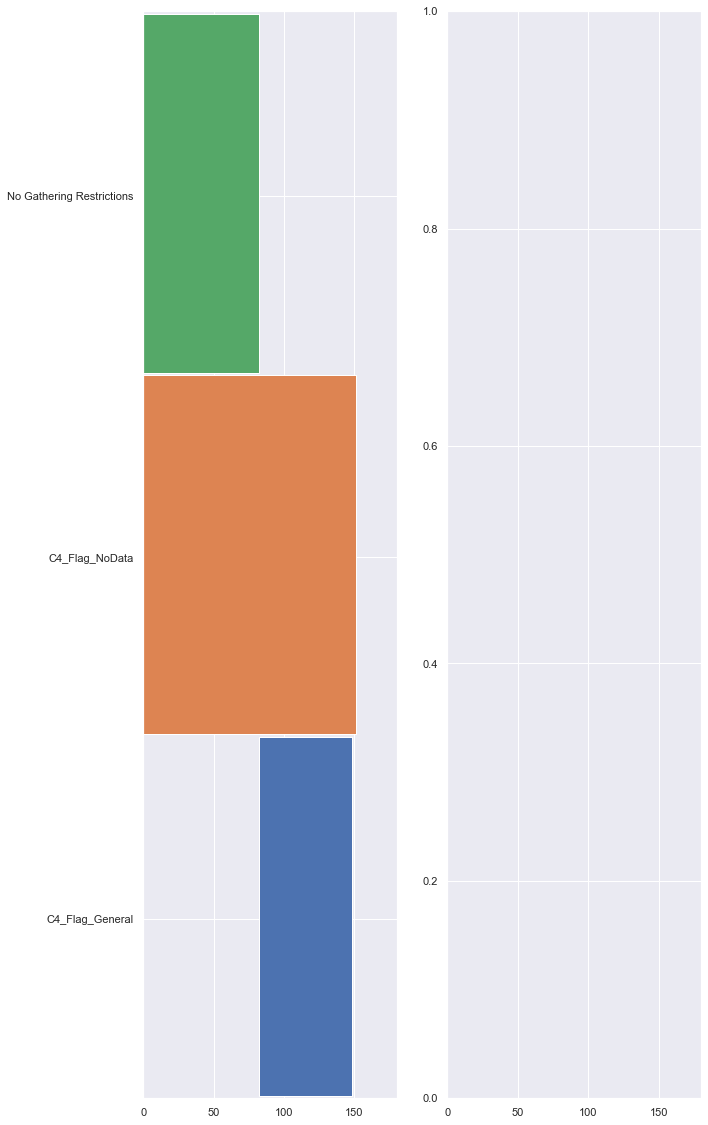

In [475]:
import matplotlib.pyplot as plt 

def addbar2(xranges_in,yranges_in,facecolor_in):
        axs[0].broken_barh(xranges_in, yranges_in, facecolors=facecolor_in)#, label='label') 
# Declaring a figure "gnt" 
figs, axs = plt.subplots(1,2,figsize=(10,20),sharex=True) 
# Setting Y-axis limits 
axs[0].set_ylim(0, figdict["dimy"]) 
  
# Setting X-axis limits 
axs[0].set_xlim(0, figdict["dimx"]) 
  
# Setting ticks on y-axis 
axs[0].set_yticks(ticklocations) 
# Labelling tickes of y-axis 
axs[0].set_yticklabels(activities) 
  
# Setting graph attribute 
axs[0].grid(True) 

# Declaring a bar in schedule 
#gnt.broken_barh(ganttdata)
for index, row in groupgannt.iterrows():
    #print(row['person'], row['activityid'], row['start'],row['duration'])
    xranges = np.array([(row['DaysSinceAnchorDate'], row['Duration'])])
    barlocation = getbarlocation(str(row['ActivityFromIndex']))
    yranges = np.array((barlocation+bargap, step-bargap))
    barcolor = getbarcolor(str(row['ActivityFromIndex']))
    facecolor = current_palette[barcolor]
    addbar2(xranges,yranges,facecolor)

#gnt.legend() 